In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 8 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,018 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120880 files and direc

In [2]:
import time
import random
import math


import numpy as np
import pandas as pd


import scipy as sp
import statsmodels.api as sm

import requests
from bs4 import BeautifulSoup


import matplotlib as mpl
import matplotlib.pylab as plb
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns


%matplotlib inline


%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='NanumBarunGothic')


mpl.rc('axes', unicode_minus=False)

In [3]:
import pandas as pd

file_path1 = '/content/gdrive/MyDrive/WCRC2023/데이터/로우 데이터/station_list_도시대기.csv'
file_path2 = '/content/gdrive/MyDrive/WCRC2023/데이터/로우 데이터/station_list_도로변대기.csv'
file_path3 = '/content/gdrive/MyDrive/WCRC2023/데이터/로우 데이터/station_list_교외대기.csv'

air1 = pd.read_csv(file_path1, encoding='utf-8')
air2 = pd.read_csv(file_path2, encoding='utf-8')
air3 = pd.read_csv(file_path3, encoding='utf-8')

print(air1.head())
print(air2.head())
print(air3.head())

  지역명 측정소명                               측정소 주소   Latitude   Longitude  \
0  경기  가남읍   경기도 여주시 가남읍 태평중앙1길 20 가남읍행정복지센터 옥상  37.201595  127.545148   
1  경기   가평         경기도 가평군 가평읍 석봉로 181 가평군청 의회동  37.831255  127.509576   
2  경기  경안동                 경기 광주시 중앙로 128 농협중앙회  37.411100  127.257982   
3  경기  고덕동  경기도 평택시 고덕면 고덕국제2로 111 종덕초등학교 2층 옥상  37.053120  127.046276   
4  경기  고색동     경기 수원시 권선구 서부로 1600 수원시도로교통관리사업소  37.250551  126.976312   

         운영기관  설치년도  
0  경기도보건환경연구원  2020  
1  경기도보건환경연구원  2010  
2  경기도보건환경연구원  2006  
3  경기도보건환경연구원  2020  
4  경기도보건환경연구원  2006  
  지역명        측정소명                          측정소 주소   Latitude   Longitude  \
0  경기   경수대로(동수원)      경기 수원시 팔달구 인계동 1047 동수원사거리  37.276739  127.030495   
1  경기         경춘로    경기도 남양주시 경춘로 433 도농역 앞 (다산동)  37.607949  127.159322   
2  경기    금암로(신장동)      경기도 오산시 금암로 7 (금암동 542-14)  37.170998  127.051573   
3  경기  대왕판교로(백현동)     경기 성남시 분당구 판교동 652-1 백현1교차로  37.381560  127.102240   
4  경기    백마로(마두역)  경기 고양시 일산동구 장항2동 888 뉴코아

In [4]:
air_loc = pd.concat([air1, air2, air3], ignore_index=True)
air_loc

,지역명,측정소명,측정소 주소,Latitude,Longitude,운영기관,설치년도
0,경기,가남읍,경기도 여주시 가남읍 태평중앙1길 20 가남읍행정복지센터 옥상,37.201595,127.545148,경기도보건환경연구원,2020
1,경기,가평,경기도 가평군 가평읍 석봉로 181 가평군청 의회동,37.831255,127.509576,경기도보건환경연구원,2010
2,경기,경안동,경기 광주시 중앙로 128 농협중앙회,37.411100,127.257982,경기도보건환경연구원,2006
3,경기,고덕동,경기도 평택시 고덕면 고덕국제2로 111 종덕초등학교 2층 옥상,37.053120,127.046276,경기도보건환경연구원,2020
4,경기,고색동,경기 수원시 권선구 서부로 1600 수원시도로교통관리사업소,37.250551,126.976312,경기도보건환경연구원,2006
...,...,...,...,...,...,...,...
120,경기,한강로,경기도 김포시 김포한강2로24번길 93 한강로사거리 (장기동),37.646831,126.674372,경기도보건환경연구원,2020
121,경기,관인면,경기 포천시 관인면 사정리 140,38.123841,127.252483,한국환경공단 수도권동부환경본부,2001
122,경기,설성면,경기 이천시 설성면 신필리 산 88-5(전파연구소 입구),37.138640,127.547225,한국환경공단 수도권동부환경본부,2000
123,경기,연천(DMZ),경기 연천군 중면 횡산리 산108-1 28사단 태풍전망대 인근,38.126438,126.973278,한국환경공단 수도권동부환경본부,2020


In [5]:
air_loc.loc[air_loc['측정소명'] == '고덕동', '측정소명'] = '고덕면'
air_loc.loc[air_loc['측정소명'] == '오포1동', '측정소명'] = '오포읍'

In [6]:
file_path4 = '/content/gdrive/MyDrive/WCRC2023/데이터/로우 데이터/대기질측정정보(2022년).csv'
air = pd.read_csv(file_path4, encoding='euc-kr')
print(air.head())

        번호  시군코드  시군명 측정소명  설치년도  측정망명             측정일시간  아황산가스농도값  일산화탄소농도값  \
0  2737343   NaN  수원시  신풍동   NaN  도시대기  2022-01-11 10:00     0.003       0.5   
1  2737344   NaN  수원시  인계동   NaN  도시대기  2022-01-11 10:00     0.003       0.4   
2  2737345   NaN  수원시  광교동   NaN  도시대기  2022-01-11 10:00     0.003       0.5   
3  2737346   NaN  수원시  영통동   NaN  도시대기  2022-01-11 10:00     0.002       0.4   
4  2737347   NaN  수원시  천천동   NaN  도시대기  2022-01-11 10:00     0.003       0.3   

   오존농도값  이산화질소농도값  미세먼지PM10농도값  미세먼지PM2점5농도값  
0  0.017     0.020         11.0           8.0  
1  0.014     0.032         29.0          17.0  
2  0.012     0.022         28.0          12.0  
3  0.017     0.021         22.0          22.0  
4  0.018     0.018         21.0          11.0  


In [7]:
from scipy.interpolate import interp1d

# 측정소명을 기준으로 데이터 정렬
air = air.sort_values(by='측정소명')

# 측정소명별로 스플라인 보간 함수 생성
interpolated_airs = {}

for location in air['측정소명'].unique():
    location_air = air[air['측정소명'] == location]
    x = location_air.index
    f = interp1d(x, location_air['미세먼지PM10농도값'], kind='linear', fill_value='extrapolate')
    interpolated_airs[location] = f

# 측정일시간을 기준으로 스플라인 보간된 값을 추가
air['미세먼지PM10농도값_스플라인'] = air.apply(lambda row: interpolated_airs[row['측정소명']](row.name), axis=1)

In [8]:
# 측정소명별로 스플라인 보간 함수 생성
interpolated_airs = {}

for location in air['측정소명'].unique():
    location_air = air[air['측정소명'] == location]
    x = location_air.index
    f = interp1d(x, location_air['아황산가스농도값'], kind='linear', fill_value='extrapolate')
    interpolated_airs[location] = f

# 측정일시간을 기준으로 스플라인 보간된 값을 추가
air['아황산가스농도값_스플라인'] = air.apply(lambda row: interpolated_airs[row['측정소명']](row.name), axis=1)

In [9]:
# 측정소명별로 스플라인 보간 함수 생성
interpolated_airs = {}

for location in air['측정소명'].unique():
    location_air = air[air['측정소명'] == location]
    x = location_air.index
    f = interp1d(x, location_air['일산화탄소농도값'], kind='linear', fill_value='extrapolate')
    interpolated_airs[location] = f

# 측정일시간을 기준으로 스플라인 보간된 값을 추가
air['일산화탄소농도값_스플라인'] = air.apply(lambda row: interpolated_airs[row['측정소명']](row.name), axis=1)

In [10]:
# 측정소명별로 스플라인 보간 함수 생성
interpolated_airs = {}

for location in air['측정소명'].unique():
    location_air = air[air['측정소명'] == location]
    x = location_air.index
    f = interp1d(x, location_air['오존농도값'], kind='linear', fill_value='extrapolate')
    interpolated_airs[location] = f

# 측정일시간을 기준으로 스플라인 보간된 값을 추가
air['오존농도값_스플라인'] = air.apply(lambda row: interpolated_airs[row['측정소명']](row.name), axis=1)

In [11]:
# 측정소명별로 스플라인 보간 함수 생성
interpolated_airs = {}

for location in air['측정소명'].unique():
    location_air = air[air['측정소명'] == location]
    x = location_air.index
    f = interp1d(x, location_air['이산화질소농도값'], kind='linear', fill_value='extrapolate')
    interpolated_airs[location] = f

# 측정일시간을 기준으로 스플라인 보간된 값을 추가
air['이산화질소농도값_스플라인'] = air.apply(lambda row: interpolated_airs[row['측정소명']](row.name), axis=1)

In [12]:
# 측정소명별로 스플라인 보간 함수 생성
interpolated_airs = {}

for location in air['측정소명'].unique():
    location_air = air[air['측정소명'] == location]
    x = location_air.index
    f = interp1d(x, location_air['미세먼지PM2점5농도값'], kind='linear', fill_value='extrapolate')
    interpolated_airs[location] = f

# 측정일시간을 기준으로 스플라인 보간된 값을 추가
air['미세먼지PM2점5농도값_스플라인'] = air.apply(lambda row: interpolated_airs[row['측정소명']](row.name), axis=1)

In [17]:
print(air.head())

             번호  시군코드  시군명 측정소명  설치년도  측정망명             측정일시간  아황산가스농도값  \
763070  4679135   NaN  여주시  가남읍   NaN  도시대기  2022-11-17 20:00     0.002   
20149   2760395   NaN  여주시  가남읍   NaN  도시대기   2022-01-19 9:00     0.002   
783333  5228107   NaN  여주시  가남읍   NaN  도시대기  2022-11-25 12:00     0.003   
616720  3435453   NaN  여주시  가남읍   NaN  도시대기   2022-09-21 5:00     0.002   
129490  2885258   NaN  여주시  가남읍   NaN  도시대기  2022-03-07 20:00     0.005   

        일산화탄소농도값  오존농도값  이산화질소농도값  미세먼지PM10농도값  미세먼지PM2점5농도값 미세먼지PM10농도값_스플라인  \
763070       0.5  0.002     0.028         86.0          51.0              nan   
20149        0.7  0.005     0.030         57.0          45.0              nan   
783333       0.6  0.008     0.025         91.0          60.0              nan   
616720       0.2  0.002     0.007         58.0          16.0              nan   
129490       0.5  0.034     0.025         95.0          38.0              nan   

       아황산가스농도값_스플라인 일산화탄소농도값_스플라인 오존농도값_스플라인 이산화질소농도값_스플라인 미세

In [18]:
print(air.dtypes)

번호                     int64
시군코드                 float64
시군명                   object
측정소명                  object
설치년도                 float64
측정망명                  object
측정일시간                 object
아황산가스농도값             float64
일산화탄소농도값             float64
오존농도값                float64
이산화질소농도값             float64
미세먼지PM10농도값          float64
미세먼지PM2점5농도값         float64
미세먼지PM10농도값_스플라인      object
아황산가스농도값_스플라인         object
일산화탄소농도값_스플라인         object
오존농도값_스플라인            object
이산화질소농도값_스플라인         object
미세먼지PM2점5농도값_스플라인     object
dtype: object


In [20]:
columns_to_convert = ['미세먼지PM10농도값_스플라인', '아황산가스농도값_스플라인', '일산화탄소농도값_스플라인',
                      '오존농도값_스플라인', '이산화질소농도값_스플라인', '미세먼지PM2점5농도값_스플라인']

air[columns_to_convert] = air[columns_to_convert].astype(float)

In [19]:
# '데이터1' 열의 결측치 비율 계산
grouped_df = air.groupby(['측정소명'])['오존농도값_스플라인'].apply(lambda x: x.isnull().mean()).reset_index(name='결측치 비율')

# 결과 출력
pd.set_option('display.max_rows', None)
print(grouped_df)

      측정소명  결측치 비율
0      가남읍     0.0
1       가평     0.0
2      경안동     0.0
3      경춘로     0.0
4      고덕면     0.0
5      고색동     0.0
6       고읍     0.0
7      고잔동     0.0
8      고천동     0.0
9      고촌읍     0.0
10     곤지암     0.0
11     공도읍     0.0
12     과천동     0.0
13     광교동     0.0
14     교문동     0.0
15     금곡동     0.0
16     금촌동     0.0
17      기흥     0.0
18    김량장동     0.0
19     남양읍     0.0
20      내동     0.0
21     단대동     0.0
22      당동     0.0
23     대부동     0.0
24     대신면     0.0
25     대야동     0.0
26     동구동     0.0
27      동탄     0.0
28     모현읍     0.0
29     목감동     0.0
30      미사     0.0
31     배곧동     0.0
32     백석읍     0.0
33     백암면     0.0
34     별내동     0.0
35     별양동     0.0
36     보산동     0.0
37     복정동     0.0
38     본오동     0.0
39     봉담읍     0.0
40     봉산동     0.0
41    부곡3동     0.0
42     부림동     0.0
43     부발읍     0.0
44     비전동     0.0
45     사우동     0.0
46     산본동     0.0
47    상대원동     0.0
48     새솔동     0.0
49     서신면     0.0
50    서해안로     0.0
51     선단동  

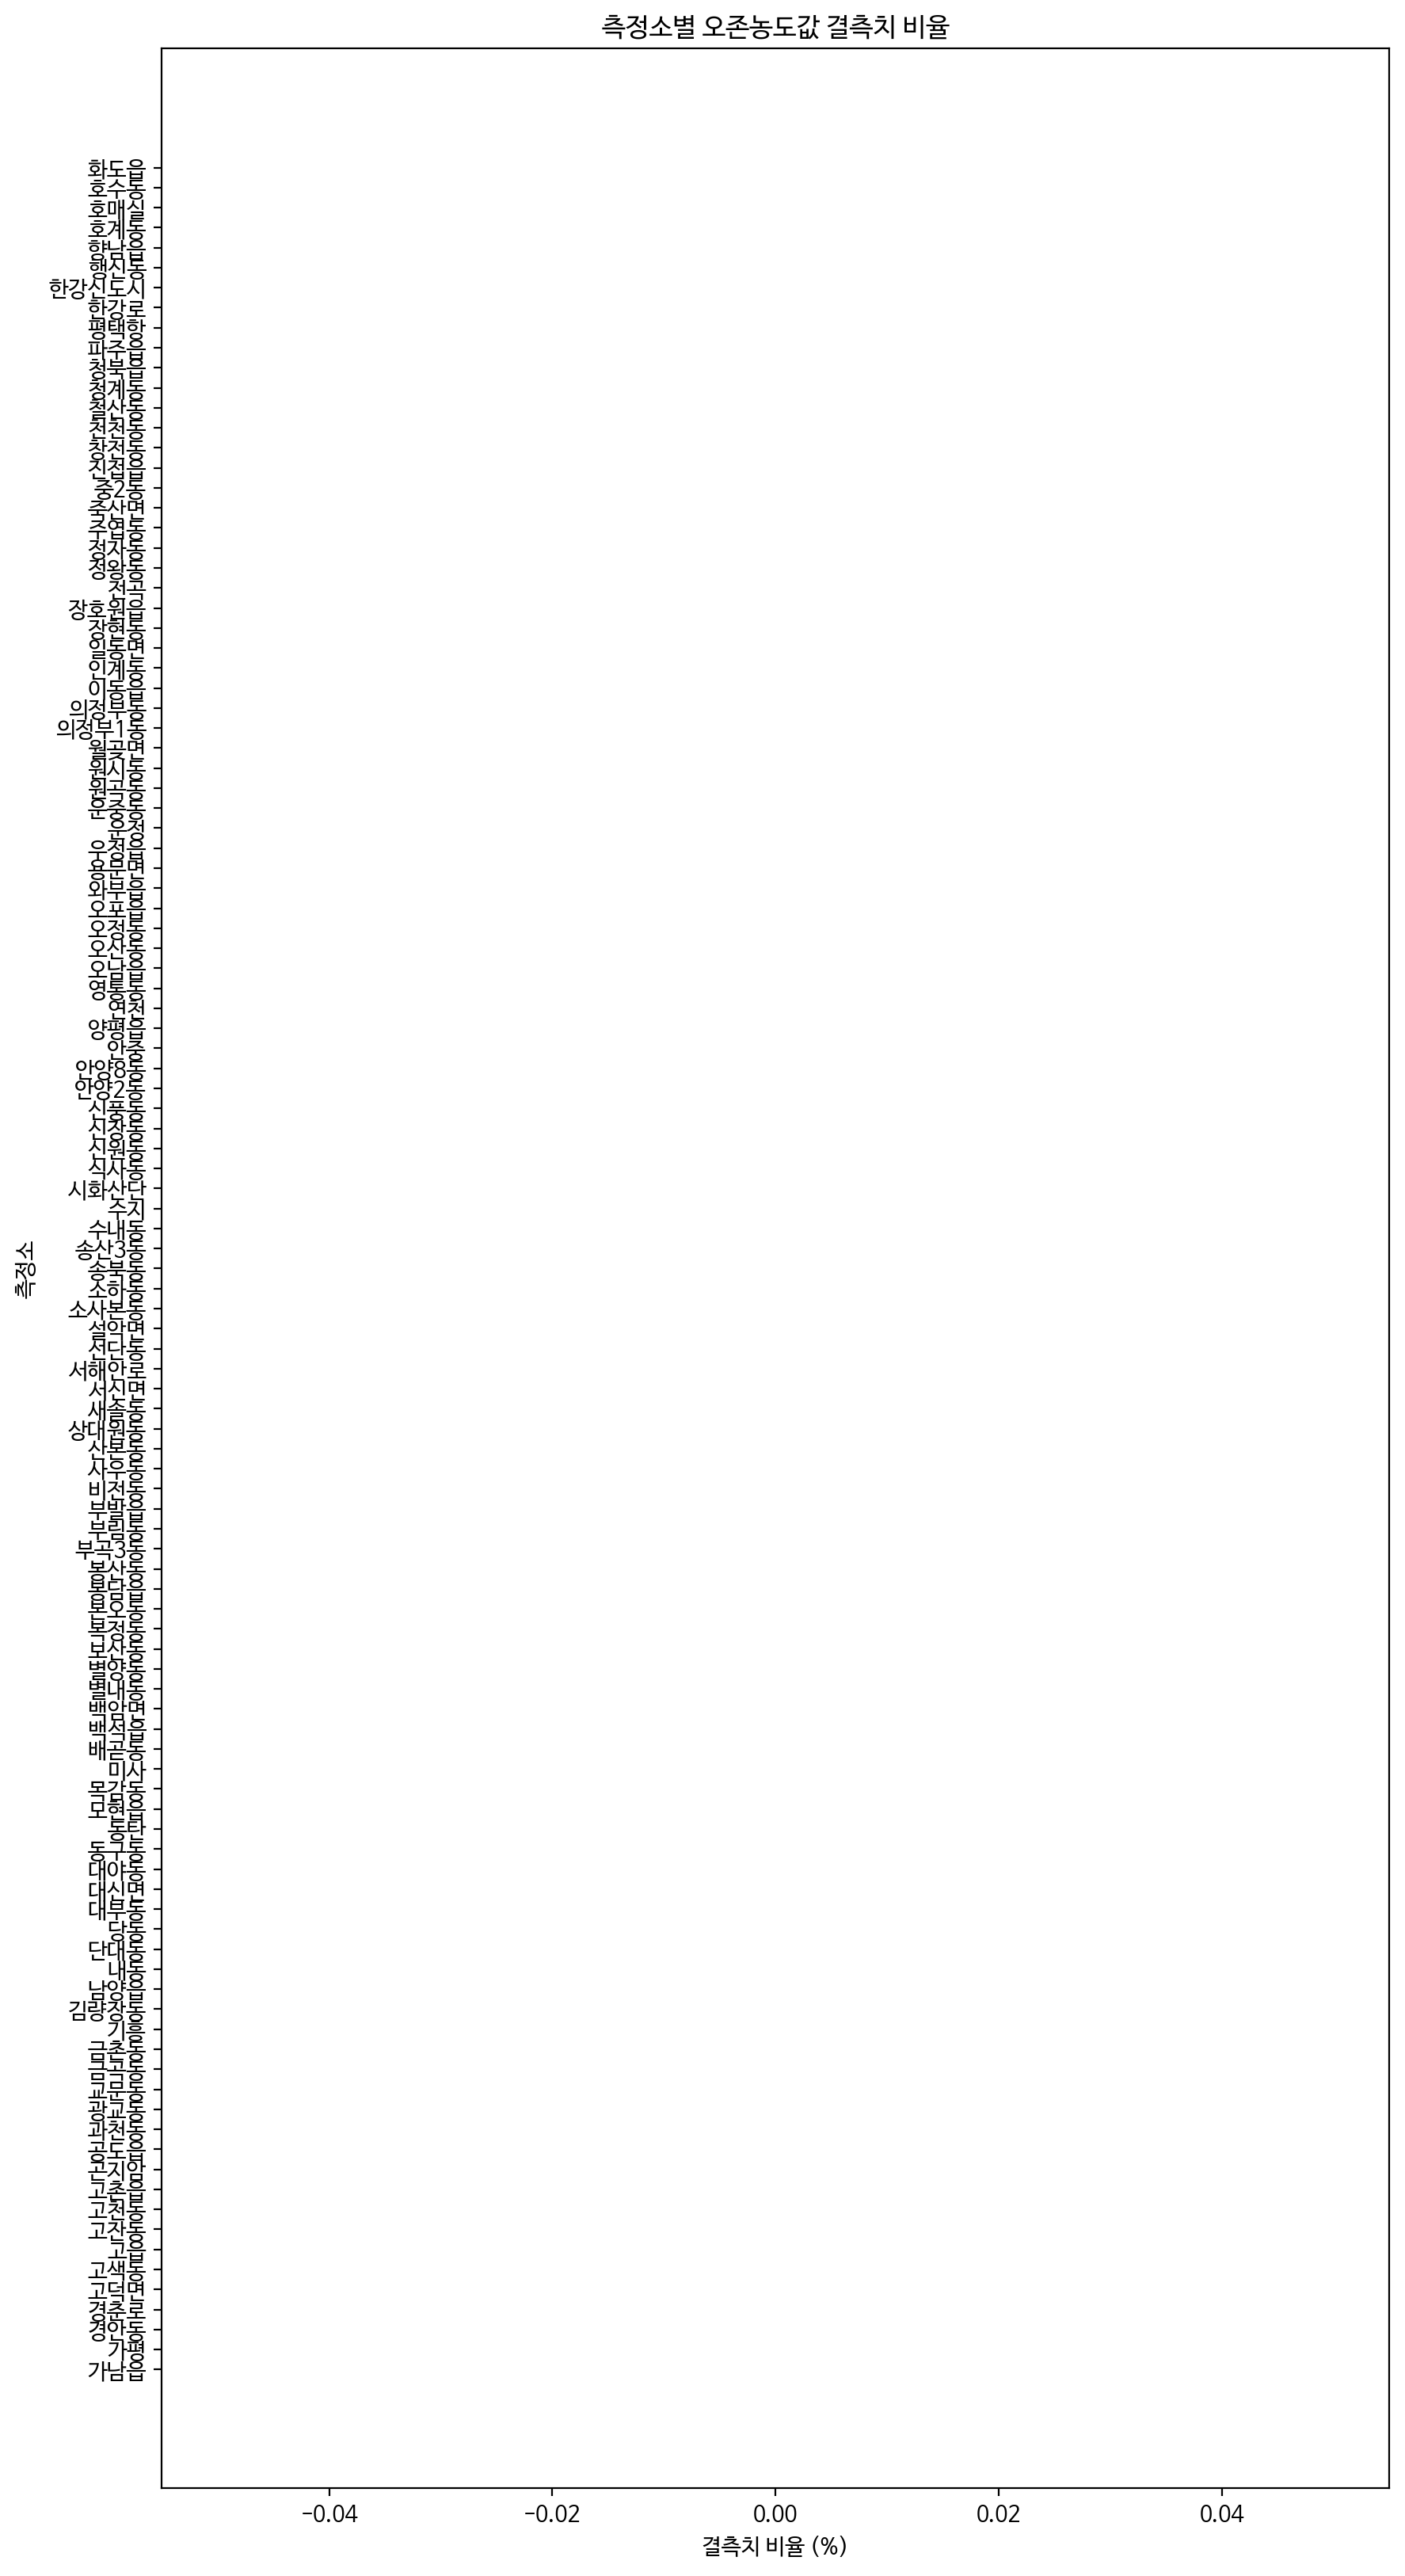

In [14]:
import matplotlib.pyplot as plt
# 시각화
plt.figure(figsize=(10, 20))
plt.barh(range(len(grouped_df)), grouped_df['결측치 비율'] * 100, color='lightcoral')
plt.yticks(range(len(grouped_df)), grouped_df['측정소명'] )
plt.ylabel('측정소')
plt.xlabel('결측치 비율 (%)')
plt.title('측정소별 오존농도값 결측치 비율')
plt.show()

In [16]:
import matplotlib.pyplot as plt

# 측정소명별로 스플라인 보간된 값 시각화
plt.figure(figsize=(12, 8))

for location in air['측정소명'].unique():
    location_air = air[air['측정소명'] == location]
    plt.plot(location_air.index, location_air['미세먼지PM10농도값'], 'o-', label=f'{location} (원 데이터)')
    plt.plot(location_air.index, location_air['미세먼지PM10농도값_스플라인'], 'x--', label=f'{location} (스플라인 보간)')

plt.title('미세먼지PM10농도값 스플라인 보간 결과')
plt.xlabel('데이터 인덱스')
plt.ylabel('미세먼지PM10농도값')
plt.legend()
plt.grid(True)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print(air.head())

             번호  시군코드  시군명 측정소명  설치년도  측정망명             측정일시간  아황산가스농도값  \
763070  4679135   NaN  여주시  가남읍   NaN  도시대기  2022-11-17 20:00     0.002   
20149   2760395   NaN  여주시  가남읍   NaN  도시대기   2022-01-19 9:00     0.002   
783333  5228107   NaN  여주시  가남읍   NaN  도시대기  2022-11-25 12:00     0.003   
616720  3435453   NaN  여주시  가남읍   NaN  도시대기   2022-09-21 5:00     0.002   
129490  2885258   NaN  여주시  가남읍   NaN  도시대기  2022-03-07 20:00     0.005   

        일산화탄소농도값  오존농도값  이산화질소농도값  미세먼지PM10농도값  미세먼지PM2점5농도값  \
763070       0.5  0.002     0.028         86.0          51.0   
20149        0.7  0.005     0.030         57.0          45.0   
783333       0.6  0.008     0.025         91.0          60.0   
616720       0.2  0.002     0.007         58.0          16.0   
129490       0.5  0.034     0.025         95.0          38.0   

        미세먼지PM10농도값_스플라인  아황산가스농도값_스플라인  일산화탄소농도값_스플라인  오존농도값_스플라인  \
763070              86.0          0.002            0.5       0.002   
20149               57.0

In [ ]:
group_air = air.groupby('측정소명').mean().reset_index()
group_air

<ipython-input-40-a8bde4d27760>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_air = air.groupby('측정소명').mean().reset_index()


,측정소명,번호,시군코드,설치년도,아황산가스농도값,일산화탄소농도값,오존농도값,이산화질소농도값,미세먼지PM10농도값,미세먼지PM2점5농도값,미세먼지PM10농도값_스플라인,아황산가스농도값_스플라인,일산화탄소농도값_스플라인,오존농도값_스플라인,이산화질소농도값_스플라인,미세먼지PM2점5농도값_스플라인
0,가남읍,3.589918e+06,NaN,NaN,0.002168,0.306950,0.029553,0.013262,44.353662,26.569161,44.338288,0.002168,0.307124,0.029493,0.013264,26.637994
1,가평,3.594867e+06,NaN,NaN,0.001948,0.402689,0.027056,0.007405,27.147132,17.012950,27.254541,0.001950,0.403070,0.026979,0.007410,17.315901
2,경안동,3.590330e+06,NaN,NaN,0.001701,0.454497,0.028470,0.022063,36.498857,18.662121,36.494062,0.001699,0.455040,0.028350,0.022089,18.687043
3,경춘로,3.590064e+06,NaN,NaN,0.002241,0.475861,0.023287,0.025659,41.845636,20.219164,41.830734,0.002241,0.476349,0.023204,0.025642,20.271757
4,고덕면,3.589528e+06,NaN,NaN,0.002929,0.358592,0.032321,0.017699,35.374350,20.826866,35.427588,0.002928,0.358848,0.032280,0.017710,20.942457
5,고색동,3.573137e+06,NaN,NaN,0.002118,0.449128,0.026600,0.021699,41.123525,17.528836,41.256380,0.002116,0.449379,0.026519,0.021712,17.633138
6,고읍,3.589504e+06,NaN,NaN,0.002465,0.350658,0.030341,0.015640,30.862709,18.829262,30.933884,0.002465,0.350815,0.030288,0.015641,19.101347
7,고잔동,3.590151e+06,NaN,NaN,0.002670,0.388019,0.027327,0.021427,32.757603,16.035497,32.761985,0.002669,0.388266,0.027213,0.021455,15.969411
8,고천동,3.591135e+06,NaN,NaN,0.001737,0.390140,0.029598,0.020770,30.859982,14.645980,30.858402,0.001735,0.390213,0.029492,0.020785,14.701379
9,고촌읍,3.590158e+06,NaN,NaN,0.002645,0.262177,0.033467,0.012689,35.113471,21.940148,35.144789,0.002647,0.262315,0.033429,0.012697,21.999858


In [ ]:
group_air = group_air.drop(columns=['아황산가스농도값'])
group_air = group_air.drop(columns=['일산화탄소농도값'])
group_air = group_air.drop(columns=['오존농도값'])
group_air = group_air.drop(columns=['이산화질소농도값'])
group_air = group_air.drop(columns=['미세먼지PM10농도값'])
group_air = group_air.drop(columns=['미세먼지PM2점5농도값'])
group_air = group_air.drop(columns=['번호'])
group_air = group_air.drop(columns=['시군코드'])
group_air = group_air.drop(columns=['설치년도'])
group_air

,측정소명,미세먼지PM10농도값_스플라인,아황산가스농도값_스플라인,일산화탄소농도값_스플라인,오존농도값_스플라인,이산화질소농도값_스플라인,미세먼지PM2점5농도값_스플라인
0,가남읍,44.338288,0.002168,0.307124,0.029493,0.013264,26.637994
1,가평,27.254541,0.001950,0.403070,0.026979,0.007410,17.315901
2,경안동,36.494062,0.001699,0.455040,0.028350,0.022089,18.687043
3,경춘로,41.830734,0.002241,0.476349,0.023204,0.025642,20.271757
4,고덕면,35.427588,0.002928,0.358848,0.032280,0.017710,20.942457
5,고색동,41.256380,0.002116,0.449379,0.026519,0.021712,17.633138
6,고읍,30.933884,0.002465,0.350815,0.030288,0.015641,19.101347
7,고잔동,32.761985,0.002669,0.388266,0.027213,0.021455,15.969411
8,고천동,30.858402,0.001735,0.390213,0.029492,0.020785,14.701379
9,고촌읍,35.144789,0.002647,0.262315,0.033429,0.012697,21.999858


In [ ]:
# 결측치 확인
missing_values = group_air.isnull().sum()
print(missing_values)

측정소명                 0
미세먼지PM10농도값_스플라인     0
아황산가스농도값_스플라인        0
일산화탄소농도값_스플라인        0
오존농도값_스플라인           0
이산화질소농도값_스플라인        0
미세먼지PM2점5농도값_스플라인    0
dtype: int64


In [ ]:
merged_df = pd.merge(air_loc, group_air, on='측정소명', how='inner')
merged_df

,지역명,측정소명,측정소 주소,Latitude,Longitude,운영기관,설치년도,미세먼지PM10농도값_스플라인,아황산가스농도값_스플라인,일산화탄소농도값_스플라인,오존농도값_스플라인,이산화질소농도값_스플라인,미세먼지PM2점5농도값_스플라인
0,경기,가남읍,경기도 여주시 가남읍 태평중앙1길 20 가남읍행정복지센터 옥상,37.201595,127.545148,경기도보건환경연구원,2020,44.338288,0.002168,0.307124,0.029493,0.013264,26.637994
1,경기,가평,경기도 가평군 가평읍 석봉로 181 가평군청 의회동,37.831255,127.509576,경기도보건환경연구원,2010,27.254541,0.001950,0.403070,0.026979,0.007410,17.315901
2,경기,경안동,경기 광주시 중앙로 128 농협중앙회,37.411100,127.257982,경기도보건환경연구원,2006,36.494062,0.001699,0.455040,0.028350,0.022089,18.687043
3,경기,고덕면,경기도 평택시 고덕면 고덕국제2로 111 종덕초등학교 2층 옥상,37.053120,127.046276,경기도보건환경연구원,2020,35.427588,0.002928,0.358848,0.032280,0.017710,20.942457
4,경기,고색동,경기 수원시 권선구 서부로 1600 수원시도로교통관리사업소,37.250551,126.976312,경기도보건환경연구원,2006,41.256380,0.002116,0.449379,0.026519,0.021712,17.633138
5,경기,고읍,경기 양주시 고읍남로 205 청소년문화의 집,37.792961,127.082798,경기도보건환경연구원,2017,30.933884,0.002465,0.350815,0.030288,0.015641,19.101347
6,경기,고잔동,경기 안산시 단원구 화랑로 387 안산시청,37.321946,126.831207,경기도보건환경연구원,1987,32.761985,0.002669,0.388266,0.027213,0.021455,15.969411
7,경기,고천동,경기 의왕시 시청로 11 의왕시청 민원실,37.344808,126.968722,경기도보건환경연구원,1995,30.858402,0.001735,0.390213,0.029492,0.020785,14.701379
8,경기,고촌읍,경기 김포시 고촌읍 신곡로 152 김포시상하수도사업소,37.606632,126.762872,경기도보건환경연구원,2001,35.144789,0.002647,0.262315,0.033429,0.012697,21.999858
9,경기,곤지암,경기도 광주시 곤지암읍 광여로 59 곤지암읍 행정복지센터 옥상,37.350952,127.352189,경기도보건환경연구원,2020,34.966710,0.001809,0.478080,0.028434,0.015580,21.148040


In [ ]:
merged_outer_df = pd.merge(air_loc, group_air, on='측정소명', how='outer')
merged_outer_df

,지역명,측정소명,측정소 주소,Latitude,Longitude,운영기관,설치년도,미세먼지PM10농도값_스플라인,아황산가스농도값_스플라인,일산화탄소농도값_스플라인,오존농도값_스플라인,이산화질소농도값_스플라인,미세먼지PM2점5농도값_스플라인
0,경기,가남읍,경기도 여주시 가남읍 태평중앙1길 20 가남읍행정복지센터 옥상,37.201595,127.545148,경기도보건환경연구원,2020,44.338288,0.002168,0.307124,0.029493,0.013264,26.637994
1,경기,가평,경기도 가평군 가평읍 석봉로 181 가평군청 의회동,37.831255,127.509576,경기도보건환경연구원,2010,27.254541,0.001950,0.403070,0.026979,0.007410,17.315901
2,경기,경안동,경기 광주시 중앙로 128 농협중앙회,37.411100,127.257982,경기도보건환경연구원,2006,36.494062,0.001699,0.455040,0.028350,0.022089,18.687043
3,경기,고덕면,경기도 평택시 고덕면 고덕국제2로 111 종덕초등학교 2층 옥상,37.053120,127.046276,경기도보건환경연구원,2020,35.427588,0.002928,0.358848,0.032280,0.017710,20.942457
4,경기,고색동,경기 수원시 권선구 서부로 1600 수원시도로교통관리사업소,37.250551,126.976312,경기도보건환경연구원,2006,41.256380,0.002116,0.449379,0.026519,0.021712,17.633138
5,경기,고읍,경기 양주시 고읍남로 205 청소년문화의 집,37.792961,127.082798,경기도보건환경연구원,2017,30.933884,0.002465,0.350815,0.030288,0.015641,19.101347
6,경기,고잔동,경기 안산시 단원구 화랑로 387 안산시청,37.321946,126.831207,경기도보건환경연구원,1987,32.761985,0.002669,0.388266,0.027213,0.021455,15.969411
7,경기,고천동,경기 의왕시 시청로 11 의왕시청 민원실,37.344808,126.968722,경기도보건환경연구원,1995,30.858402,0.001735,0.390213,0.029492,0.020785,14.701379
8,경기,고촌읍,경기 김포시 고촌읍 신곡로 152 김포시상하수도사업소,37.606632,126.762872,경기도보건환경연구원,2001,35.144789,0.002647,0.262315,0.033429,0.012697,21.999858
9,경기,곤지암,경기도 광주시 곤지암읍 광여로 59 곤지암읍 행정복지센터 옥상,37.350952,127.352189,경기도보건환경연구원,2020,34.966710,0.001809,0.478080,0.028434,0.015580,21.148040


In [ ]:
# 결측치 확인
missing_values_rows = merged_outer_df[merged_outer_df.isnull().any(axis=1)]
missing_values_rows

,지역명,측정소명,측정소 주소,Latitude,Longitude,운영기관,설치년도,미세먼지PM10농도값_스플라인,아황산가스농도값_스플라인,일산화탄소농도값_스플라인,오존농도값_스플라인,이산화질소농도값_스플라인,미세먼지PM2점5농도값_스플라인
41,경기,부곡동1,경기 안산시 상록구 성호로 326 부곡동 행정복지센터,37.331687,126.861011,경기도보건환경연구원,2001,NaN,NaN,NaN,NaN,NaN,NaN
94,경기,중앙동(경기),경기 여주시 여흥로11번길 26 중앙동행정복지센터,37.298662,127.628936,경기도보건환경연구원,2010,NaN,NaN,NaN,NaN,NaN,NaN
110,경기,경수대로(동수원),경기 수원시 팔달구 인계동 1047 동수원사거리,37.276739,127.030495,경기도보건환경연구원,2004,NaN,NaN,NaN,NaN,NaN,NaN
112,경기,금암로(신장동),경기도 오산시 금암로 7 (금암동 542-14),37.170998,127.051573,경기도보건환경연구원,2019,NaN,NaN,NaN,NaN,NaN,NaN
113,경기,대왕판교로(백현동),경기 성남시 분당구 판교동 652-1 백현1교차로,37.381560,127.102240,경기도보건환경연구원,2011,NaN,NaN,NaN,NaN,NaN,NaN
114,경기,백마로(마두역),경기 고양시 일산동구 장항2동 888 뉴코아백화점사거리,37.655049,126.775337,경기도보건환경연구원,2004,NaN,NaN,NaN,NaN,NaN,NaN
116,경기,성남대로(모란역),경기 성남시 수정구 성남대로 1229 모란역사거리,37.436335,127.130138,경기도보건환경연구원,2004,NaN,NaN,NaN,NaN,NaN,NaN
117,경기,송내대로(중동),경기 부천시 송내대로 262 계남공원,37.506053,126.759558,경기도보건환경연구원,2004,NaN,NaN,NaN,NaN,NaN,NaN
118,경기,중부대로(구갈동),경기 용인시 기흥구 구갈동 505-3 녹십자사거리,37.274934,127.113381,경기도보건환경연구원,2011,NaN,NaN,NaN,NaN,NaN,NaN
119,경기,중앙대로(고잔동),경기 안산시 단원구 중앙대로 822 안산P1펌프장,37.316742,126.827929,경기도보건환경연구원,2009,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
merged_df.to_csv('/content/gdrive/MyDrive/WCRC2023/데이터/전처리 중 데이터/대기오염_결측치제거.csv', index=False, encoding='euc-kr')
merged_outer_df.to_csv('/content/gdrive/MyDrive/WCRC2023/데이터/전처리 중 데이터/대기오염_결측치포함.csv', index=False, encoding='euc-kr')